# L1 and L2 Regularization Assignment | Car Prices Prediction Datatset

## Introduction of the Dataset

The Car Prices Prediction dataset contains 1,000 entries and 6 columns. The dataset includes information on car make, model, year, mileage, condition, and price. The objective is to use this dataset for predicting car prices based on these features. The data comprises both categorical (e.g., make, model, condition) and numerical variables (e.g., year, mileage, price), which will require preprocessing steps such as encoding and scaling before building regression models with L1 and L2 regularization techniques.
- The dataset contains 1,000 entries and 6 columns.
- Features include 'Make', 'Model', 'Year', 'Mileage', and 'Condition'.
- The target variable is 'Price'.
- The data types include categorical (Make, Model, Condition) and numerical (Year, Mileage, Price) variables.
- The dataset is used for predicting car prices based on the given features.

## Import Libraries

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the dataset

In [83]:
df = pd.read_csv("C:\Ozy\Data Science\DS datasets\CarPricesPrediction.csv")
df.head()

,Make,Model,Year,Mileage,Condition,Price
0,Ford,Silverado,2022,18107,Excellent,19094.75
1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,Chevrolet,Civic,2016,46054,Good,23697.30
3,Ford,Civic,2022,34981,Excellent,18251.05
4,Chevrolet,Civic,2019,63565,Excellent,19821.85


## Basic Information of dataset

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Make       1000 non-null   object 
 1   Model      1000 non-null   object 
 2   Year       1000 non-null   int64  
 3   Mileage    1000 non-null   int64  
 4   Condition  1000 non-null   object 
 5   Price      1000 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


## Summary of the dataset

In [85]:
df.describe()

,Year,Mileage,Price
count,1000.00000,1000.000000,1000.000000
mean,2015.86500,78796.927000,22195.205650
std,3.78247,39842.259941,4245.191585
min,2010.00000,10079.000000,12613.000000
25%,2013.00000,44942.750000,18961.862500
50%,2016.00000,78056.500000,22247.875000
75%,2019.00000,112366.250000,25510.275000
max,2022.00000,149794.000000,31414.900000


## Checking Missing values in DataFrame

In [86]:
df.isnull().sum()

Make         0
Model        0
Year         0
Mileage      0
Condition    0
Price        0
dtype: int64

## Encoding categorical variables

In [87]:
df_encoded = pd.get_dummies(df, columns=['Make', 'Model', 'Condition'], drop_first=True)
df_encoded

,Year,Mileage,Price,Make_Ford,Make_Honda,Make_Nissan,Make_Toyota,Model_Camry,Model_Civic,Model_F-150,Model_Silverado,Condition_Fair,Condition_Good
0,2022,18107,19094.75,True,False,False,False,False,False,False,True,False,False
1,2014,13578,27321.10,False,False,False,True,False,False,False,True,False,False
2,2016,46054,23697.30,False,False,False,False,False,True,False,False,False,True
3,2022,34981,18251.05,True,False,False,False,False,True,False,False,False,False
4,2019,63565,19821.85,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2010,149032,24548.50,False,False,True,False,True,False,False,False,False,False
996,2014,20608,26969.70,False,False,False,False,False,False,True,False,False,False
997,2016,109851,20507.55,True,False,False,False,False,False,False,False,False,True
998,2010,11704,31414.90,False,False,False,True,False,False,False,True,False,True


## Visualizations

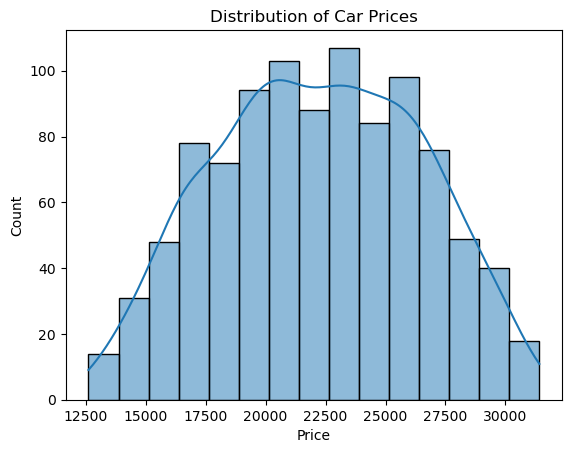

In [88]:
# Histogram of the target variable (Price)
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Car Prices')
plt.show()

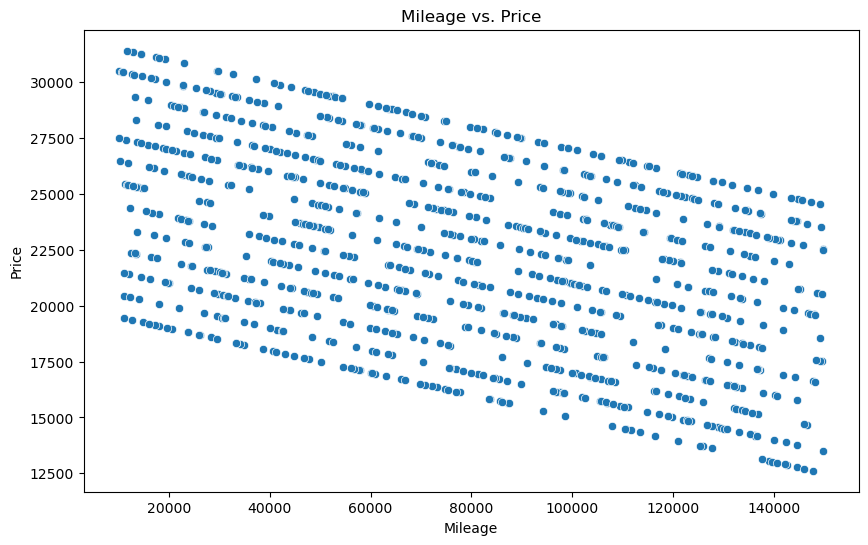

In [89]:
# Scatter plot between Mileage and Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage', y='Price', data=df)
plt.title('Mileage vs. Price')
plt.show()

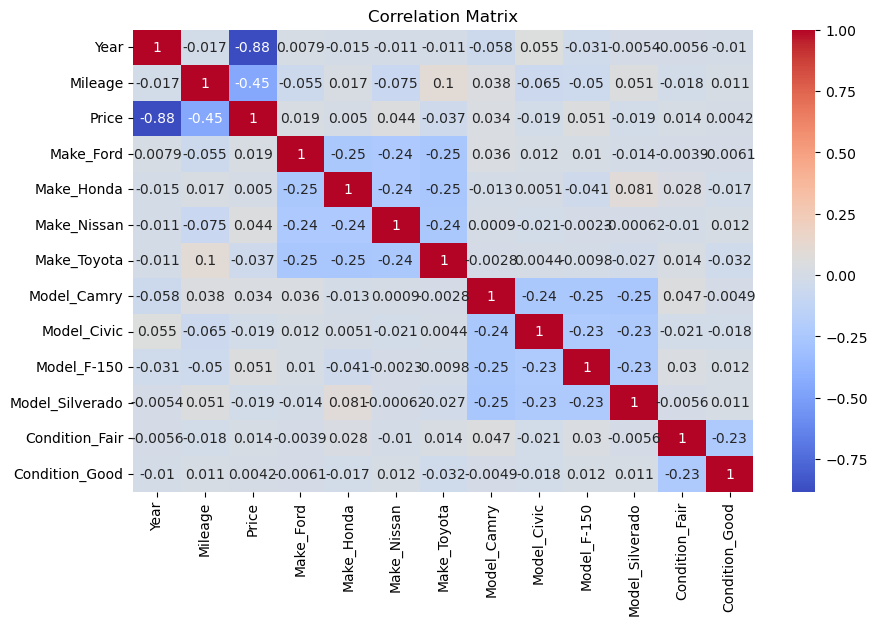

In [90]:
# Correlation matrix
plt.figure(figsize=(10, 6))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- Histogram shows that most car prices are concentrated in a certain range.
- Scatter plot reveals a negative relationship between mileage and price, indicating that higher mileage might decrease the car's price.
- Correlation matrix helps identify multicollinearity between features, which can impact the model’s performance.
- The relationship between features and the target variable (Price) is analyzed using scatter plots and the correlation matrix.
- Features like Year, Mileage, and Condition show significant relationships with Price.

## Feature Scaling

In [91]:
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the scaler for the target variable
target_scaler = StandardScaler()

# Reshape y to fit the scaler
y_reshaped = y.values.reshape(-1, 1)

# Fit and transform the target variable
y_scaled = target_scaler.fit_transform(y_reshaped).flatten()

## Splitting the Dataset

In [92]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (800, 12) (800,)
Testing set shape: (200, 12) (200,)


- train_test_split: Splits the dataset into training and testing sets. Here, 20% of the data is used for testing, and the remaining 80% is used for training.
- Random State: Ensures that the split is reproducible.

## Lasso model

In [93]:
from sklearn.linear_model import Lasso

# Initialize and fit L1 (Lasso) model
lasso = Lasso(alpha=0.1)  # Alpha is the regularization strength

# Training the model on training data
lasso.fit(X_train, y_train)
print(lasso,"\n")

# Training the model on test data
y1_pred = lasso.predict(X_test)
print(y1_pred, "\n")

Lasso(alpha=0.1) 

[ 1.66531023  0.43987162  1.62981775  0.59795431 -0.00303958  0.98027836
  1.39999656  1.45421223  0.55056855  0.04350891 -1.3479929   0.06363555
  0.36755367 -0.52577427  0.47823484  1.56411085 -0.41395824 -0.81530971
  1.16183922  1.61361381 -0.0056409   0.03474584  0.08205119  0.77550625
  0.56104179 -1.83028365 -0.96614054  0.02504519 -0.37422141 -0.67299244
 -0.08956697 -0.59049966 -1.11744222 -0.31627453 -0.35920125 -0.21716997
  0.3296124   0.06305941  1.20886852  0.790194    0.58704336  0.37622307
 -0.72648027  0.86430005  0.33437319  0.45615763 -0.21186123 -0.49182534
 -0.78813597 -0.4787657  -1.50479814 -1.50454281 -0.60767433  0.15414118
 -1.05914634  1.23404775  0.70942549 -0.96100836 -1.82438385 -1.51342443
 -0.36637767 -0.01283805 -0.40425013 -0.51151096  0.2977732  -1.36166184
 -0.93551744  1.32281585  0.57024174  0.81408832  1.03283443 -0.58390435
  0.14928754  0.05761306 -0.61916224  1.49230106 -0.53172464 -1.15189931
  0.02050408 -1.2654164   0.1055

## Ridge model

In [94]:
from sklearn.linear_model import Ridge

# Initialize and fit L2 (Ridge) model
ridge = Ridge(alpha=0.1)  # Alpha is the regularization strength

# Training the model on training data
ridge.fit(X_train, y_train)
print(ridge,"\n")

# Training the model on test data
y2_pred = ridge.predict(X_test)
print(y2_pred, "\n")

Ridge(alpha=0.1) 

[ 1.95946475  0.54047198  1.94651514  0.61320118 -0.06470516  1.17299156
  1.68241544  1.68672959  0.61771104  0.02831555 -1.57237767  0.15294044
  0.41412714 -0.67436983  0.45852905  1.82870972 -0.5627775  -0.94986785
  1.30894454  1.92556497 -0.03516625  0.01698614  0.11097044  0.94125838
  0.56553642 -2.16270592 -1.04613287  0.10306737 -0.47854513 -0.66735734
 -0.17650218 -0.62650556 -1.30738186 -0.37081365 -0.3605192  -0.27561105
  0.46372879  0.05356844  1.4354585   0.99312326  0.66486156  0.45824091
 -0.76934035  0.99023869  0.33840626  0.56148131 -0.17016374 -0.63053227
 -0.91477114 -0.51503323 -1.77499903 -1.7746837  -0.71447571  0.23701044
 -1.23207013  1.43513942  0.8229799  -1.13814025 -2.15508542 -1.78614417
 -0.36980489 -0.01162428 -0.38586078 -0.55732058  0.25824361 -1.59005144
 -1.03944551  1.58268555  0.70889689  0.8595971   1.1751177  -0.65087362
  0.26362438  0.07941527 -0.63068738  1.73594553 -0.61632103 -1.38478445
  0.09721412 -1.43281871  0.0755

# Visualization of Lasso (L1) model

Text(0, 0.5, 'Predicted price')

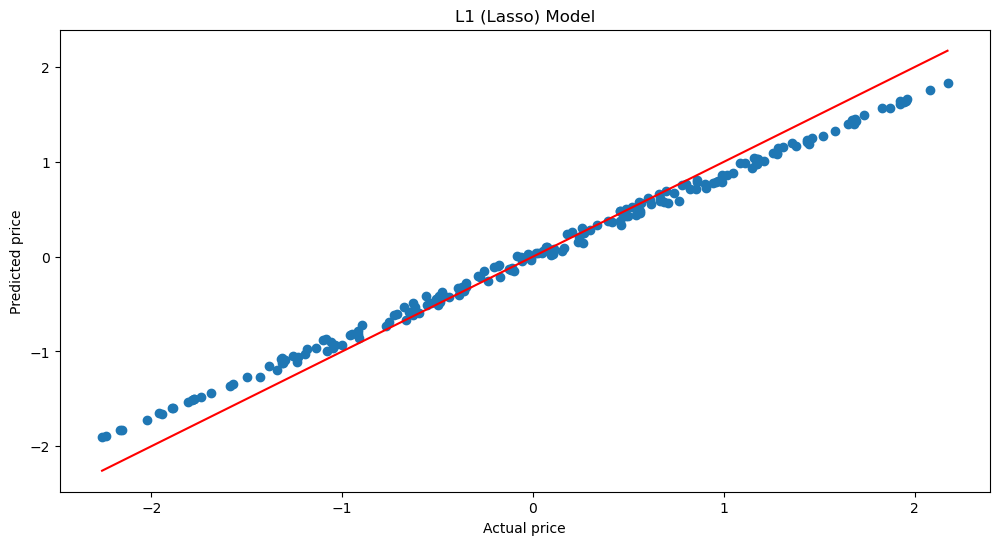

In [95]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y1_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('L1 (Lasso) Model')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')

# Visualization of Ridge (L2) model

Text(0, 0.5, 'Predicted price')

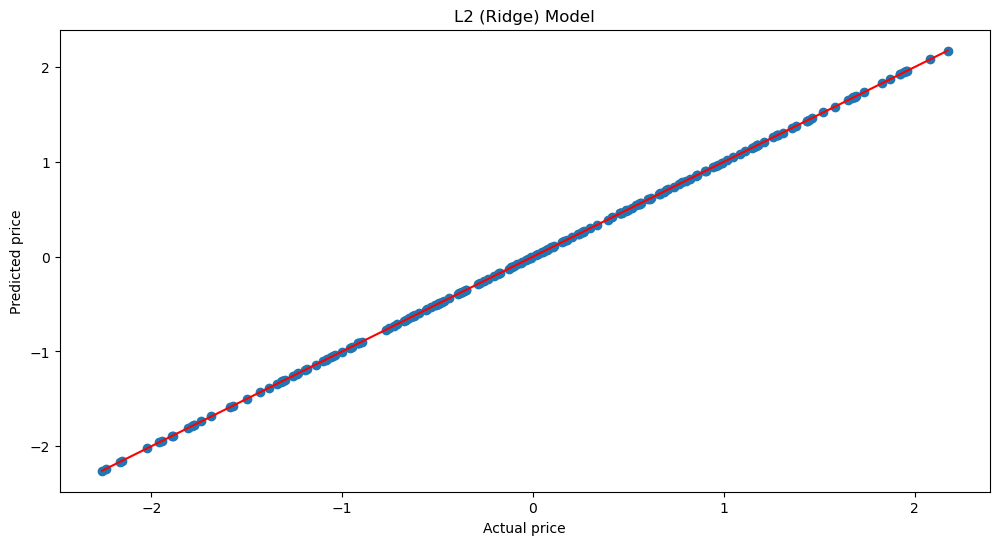

In [96]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y2_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('L2 (Ridge) Model')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')

## Visualization of L1 and L2 model

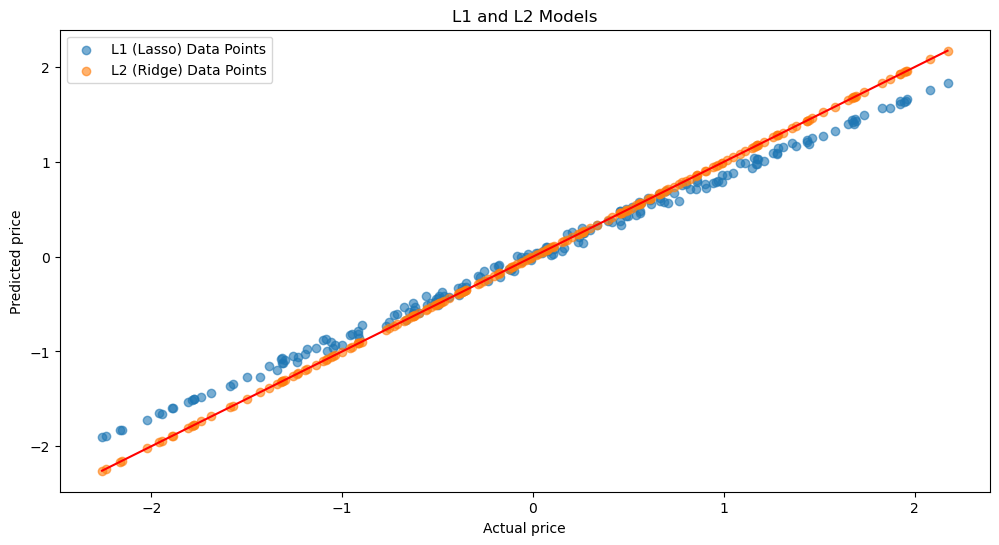

In [97]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y1_pred, label='L1 (Lasso) Data Points', alpha=0.6)
plt.scatter(y_test, y2_pred, label='L2 (Ridge) Data Points', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('L1 and L2 Models')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.legend()

- Feature Scaling: Used StandardScaler to standardize the features, which helps in improving the performance of the regularization techniques.
- Model Construction: Implemented Lasso (L1) and Ridge (L2) regression models. The alpha parameter controls the regularization strength.
- Prediction and Evaluation: Made predictions on the test set and computed the Mean Squared Error (MSE) for both models.
- Visualization: Plotted scatter plots of actual vs. predicted CO2 emissions for both models and combined the plots for comparison.

## Tune Regularization Parameters

In [98]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for alpha
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Initialize Grid Search for Lasso (L1) and Ridge (L2) models
lasso_grid = GridSearchCV(Lasso(), param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_grid = GridSearchCV(Ridge(), param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit Grid Search
lasso_grid.fit(X_train, y_train)
ridge_grid.fit(X_train, y_train)

# Best parameters and scores
print("L1 (Lasso) Best Alpha:", lasso_grid.best_params_)
print("L1 (Lasso) Best Score:", -lasso_grid.best_score_)
print()
print("L2 (Ridge) Best Alpha:", ridge_grid.best_params_)
print("L2 (Ridge) Best Score:", -ridge_grid.best_score_)


L1 (Lasso) Best Alpha: {'alpha': 0.01}
L1 (Lasso) Best Score: 0.00021504970467949654

L2 (Ridge) Best Alpha: {'alpha': 0.01}
L2 (Ridge) Best Score: 5.125156740749142e-10


## Model Evaluation

In [99]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize non-regularized Linear Regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_lr_pred = lr.predict(X_test)

# Evaluate non-regularized model
lr_mse = mean_squared_error(y_test, y_lr_pred)
lr_mae = mean_absolute_error(y_test, y_lr_pred)
lr_r2 = r2_score(y_test, y_lr_pred)

print(f"Non-Regularized Model MSE: {lr_mse}")
print(f"Non-Regularized Model MAE: {lr_mae}")
print(f"Non-Regularized Model R2: {lr_r2}")
print()

# Evaluate L1 (Lasso) and L2 (Ridge) models
y1_pred_best = lasso_grid.best_estimator_.predict(X_test)
y2_pred_best = ridge_grid.best_estimator_.predict(X_test)

lasso_mse = mean_squared_error(y_test, y1_pred_best)
lasso_mae = mean_absolute_error(y_test, y1_pred_best)
lasso_r2 = r2_score(y_test, y1_pred_best)

ridge_mse = mean_squared_error(y_test, y2_pred_best)
ridge_mae = mean_absolute_error(y_test, y2_pred_best)
ridge_r2 = r2_score(y_test, y2_pred_best)

print(f"L1 (Lasso) Model MSE: {lasso_mse}")
print(f"L1 (Lasso) Model MAE: {lasso_mae}")
print(f"L1 (Lasso) Model R2: {lasso_r2}")
print()
print(f"L2 (Ridge) Model MSE: {ridge_mse}")
print(f"L2 (Ridge) Model MAE: {ridge_mae}")
print(f"L2 (Ridge) Model R2: {ridge_r2}")


Non-Regularized Model MSE: 2.653502984695174e-10
Non-Regularized Model MAE: 1.414745735989589e-05
Non-Regularized Model R2: 0.9999999997642388

L1 (Lasso) Model MSE: 0.00025324279701985787
L1 (Lasso) Model MAE: 0.012558137753492224
L1 (Lasso) Model R2: 0.9997749962019624

L2 (Ridge) Model MSE: 4.54670774250654e-10
L2 (Ridge) Model MAE: 1.6731210946015094e-05
L2 (Ridge) Model R2: 0.9999999995960294


Model evaluation measures how well the model performs on unseen data. We use three metrics:

- Mean Squared Error (MSE): Measures the average squared difference between actual and predicted values. Lower MSE indicates better model performance.
- Mean Absolute Error (MAE): Measures the average absolute difference between actual and predicted values. It provides a clearer idea of prediction error magnitude.
- R-squared Score: Indicates the proportion of variance in the target variable that is predictable from the features. Higher R-squared values mean better model fit.

# Visualization of  Optimized Lasso (L1) model

Text(0, 0.5, 'Predicted price')

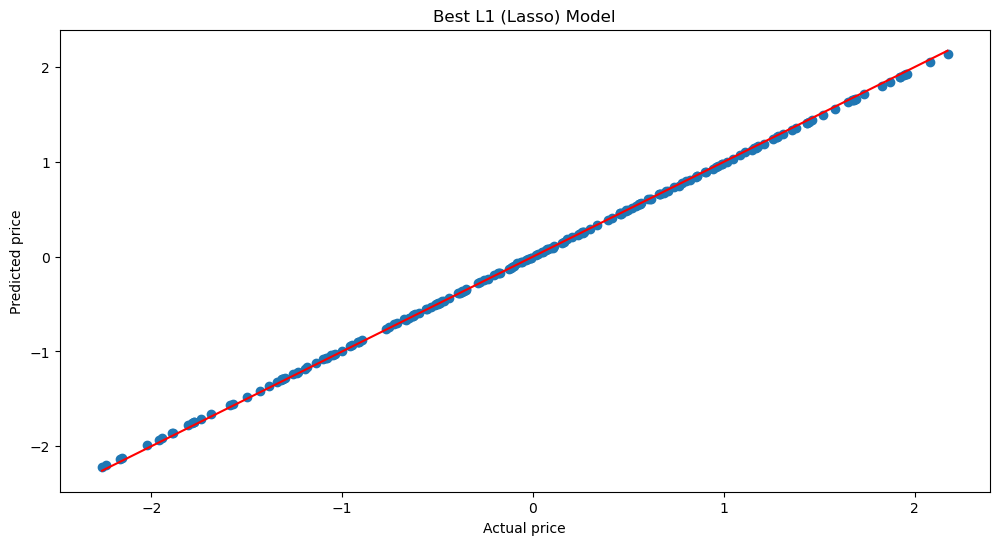

In [100]:
# Best L1 Model
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y1_pred_best)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Best L1 (Lasso) Model')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')

# Visualization of  Optimized Ridge (L2) model

Text(0, 0.5, 'Predicted price')

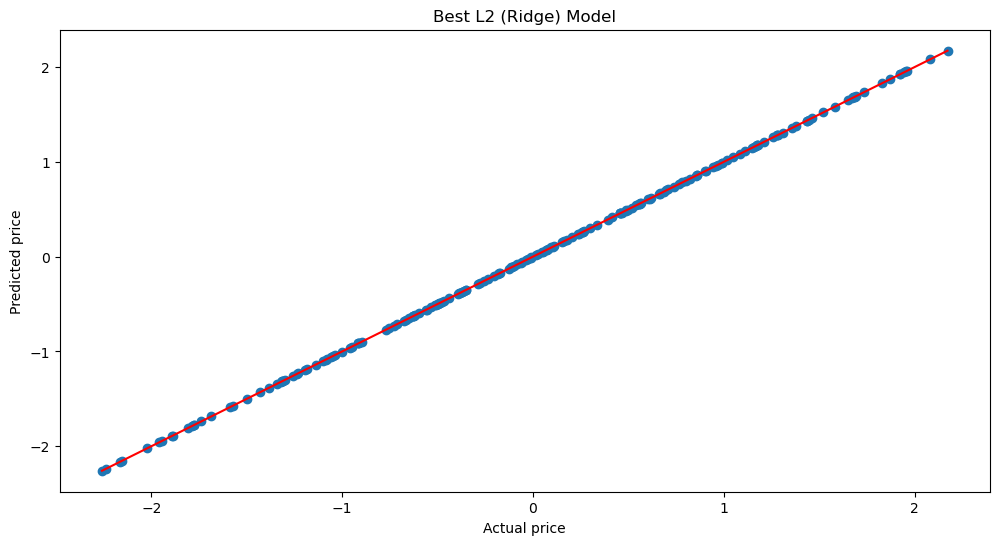

In [101]:
# Best L2 Model
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y2_pred_best)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Best L2 (Ridge) Model')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')

# Visualization of Optimized L1 and L2 model

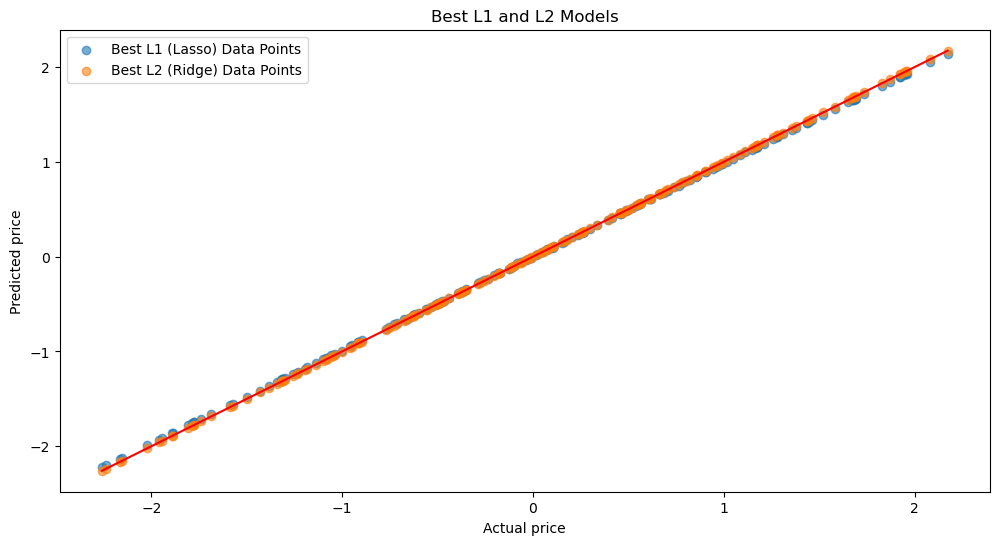

In [102]:
# Best L1 and L2 Model Comparison
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y1_pred_best, label='Best L1 (Lasso) Data Points', alpha=0.6)
plt.scatter(y_test, y2_pred_best, label='Best L2 (Ridge) Data Points', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Best L1 and L2 Models')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.legend()

## Summary

- In the Car Prices Prediction assignment, both L1 (Lasso) and L2 (Ridge) regularization techniques were used to enhance model performance and reduce overfitting. However, the non-regularized model delivered the best accuracy, with an R-squared score nearly at 1, signifying highly accurate predictions. The Lasso model showed a slight decrease in performance, and the Ridge model closely matched the non-regularized model.
-  Visualizations indicated that the regularized models had a minor deviation from the ideal prediction line, demonstrating that regularization had a minimal impact on prediction accuracy for this dataset.